In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
%matplotlib inline

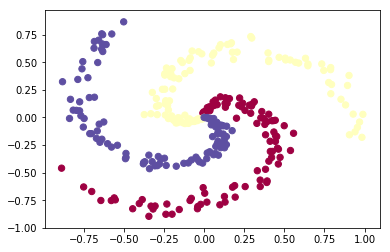

In [75]:
#Spiral Data
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

trainX = X
trainY = y

trainY = np.array(pd.get_dummies(trainY))

In [76]:
def graph(model):
    plt.figure()
    xx, yy = make_meshgrid(trainX[:, 0], trainX[:, 1])
    Z = np.c_[xx.ravel(), yy.ravel()]

    Z = model.predict(Z)
    Z = np.argmax(Z, axis=1)

    Z = Z.reshape(xx.shape)

    cp = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(trainX[:, 0], trainX[:, 1], c=np.argmax(trainY, axis=1), cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    

In [77]:
def  make_meshgrid (x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [184]:
from tensorflow.python.keras.layers import Input, Dense, Lambda, concatenate
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import backend as K

def attention(data):
    return data[0] * data[2] + data[1] * (1 - data[2])

inputs = Input(shape=(2,))

x = Dense(20, activation='relu')(inputs)
pred1 = Dense(3, activation='softmax')(x)

x = Dense(20, activation='tanh')(inputs)
pred2 = Dense(3, activation='softmax')(x)

pred_concat = concatenate([pred1, pred2])
weight = Dense(1, activation='sigmoid')(pred_concat)

predictions = Lambda(attention)([pred1, pred2, weight])

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='mse')

#model.summary()

In [185]:
model.fit(trainX, trainY, epochs=200, batch_size=32)

Epoch 1/200
300/300 [==============================] - 1s 3ms/step - loss: 0.2276
Epoch 2/200
300/300 [==============================] - 0s 97us/step - loss: 0.2214
Epoch 3/200
300/300 [==============================] - 0s 98us/step - loss: 0.2167
Epoch 4/200
300/300 [==============================] - 0s 95us/step - loss: 0.2122
Epoch 5/200
300/300 [==============================] - 0s 97us/step - loss: 0.2083
Epoch 6/200
300/300 [==============================] - 0s 91us/step - loss: 0.2042
Epoch 7/200
300/300 [==============================] - 0s 99us/step - loss: 0.2004
Epoch 8/200
300/300 [==============================] - 0s 95us/step - loss: 0.1968
Epoch 9/200
300/300 [==============================] - 0s 91us/step - loss: 0.1935
Epoch 10/200
300/300 [==============================] - 0s 102us/step - loss: 0.1903
Epoch 11/200
300/300 [==============================] - 0s 98us/step - loss: 0.1872
Epoch 12/200
300/300 [==============================] - 0s 101us/step - loss: 0.1844


300/300 [==============================] - 0s 94us/step - loss: 0.1235
Epoch 99/200
300/300 [==============================] - 0s 101us/step - loss: 0.1230
Epoch 100/200
300/300 [==============================] - 0s 92us/step - loss: 0.1226
Epoch 101/200
300/300 [==============================] - 0s 96us/step - loss: 0.1221
Epoch 102/200
300/300 [==============================] - 0s 90us/step - loss: 0.1216
Epoch 103/200
300/300 [==============================] - 0s 95us/step - loss: 0.1212
Epoch 104/200
300/300 [==============================] - 0s 88us/step - loss: 0.1207
Epoch 105/200
300/300 [==============================] - 0s 99us/step - loss: 0.1201
Epoch 106/200
300/300 [==============================] - 0s 88us/step - loss: 0.1198
Epoch 107/200
300/300 [==============================] - 0s 95us/step - loss: 0.1192
Epoch 108/200
300/300 [==============================] - 0s 90us/step - loss: 0.1187
Epoch 109/200
300/300 [==============================] - 0s 89us/step - loss: 0

300/300 [==============================] - 0s 101us/step - loss: 0.0756
Epoch 195/200
300/300 [==============================] - 0s 107us/step - loss: 0.0750
Epoch 196/200
300/300 [==============================] - 0s 96us/step - loss: 0.0746
Epoch 197/200
300/300 [==============================] - 0s 97us/step - loss: 0.0741
Epoch 198/200
300/300 [==============================] - 0s 95us/step - loss: 0.0738
Epoch 199/200
300/300 [==============================] - 0s 96us/step - loss: 0.0733
Epoch 200/200
300/300 [==============================] - 0s 91us/step - loss: 0.0727


In [186]:
#for i, x in enumerate(model.layers):
#    print (i, x)

model2 = Model(inputs=inputs, outputs=weight)
model2.compile(optimizer='rmsprop',
              loss='mse')

model2.predict(trainX)

array([[0.9502926 ],
       [0.9504583 ],
       [0.95021075],
       [0.950436  ],
       [0.9511017 ],
       [0.9507848 ],
       [0.94987434],
       [0.9478669 ],
       [0.9480107 ],
       [0.94953907],
       [0.9487084 ],
       [0.94738036],
       [0.9466396 ],
       [0.9458487 ],
       [0.9445757 ],
       [0.9474603 ],
       [0.93908495],
       [0.94657594],
       [0.9399009 ],
       [0.9385107 ],
       [0.93311006],
       [0.944318  ],
       [0.94080555],
       [0.9378346 ],
       [0.9316359 ],
       [0.93011856],
       [0.9280398 ],
       [0.9309867 ],
       [0.93426985],
       [0.9254567 ],
       [0.92882603],
       [0.9279331 ],
       [0.9287398 ],
       [0.9209688 ],
       [0.9295277 ],
       [0.9201328 ],
       [0.9216179 ],
       [0.91809946],
       [0.9158821 ],
       [0.9152149 ],
       [0.9161848 ],
       [0.9074689 ],
       [0.91172606],
       [0.91027397],
       [0.9086957 ],
       [0.903181  ],
       [0.88476133],
       [0.895

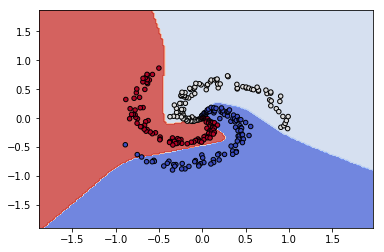

In [187]:
graph(model)